In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


In [2]:
df = pd.read_csv('../input/hotel-booking-demand/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null.sort_values(ascending = False, by='Percentage Null Values')

,Null Values,Percentage Null Values
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350
reserved_room_type,0,0.000000
assigned_room_type,0,0.000000
booking_changes,0,0.000000
deposit_type,0,0.000000
hotel,0,0.000000
previous_cancellations,0,0.000000


In [6]:
df = df.drop(["company","agent"],axis=1)

In [7]:
df["children"].fillna(0,inplace = True)
df["country"].fillna("UNKNOWN",inplace = True)

# What percentage of bookings got cancelled?

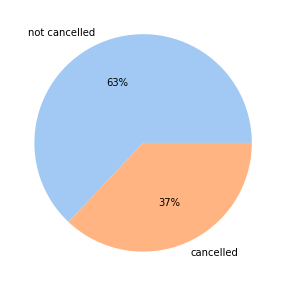

In [8]:
df_cancelled = df['is_canceled'].value_counts()
#df_cancelled = pd.DataFrame({'Count':(df_cancelled/len(df))*100})

plt.figure(figsize=(5,5))
#sns.barplot(x = df_cancelled.index,y = df_cancelled.Count)
#plt.ylabel("Percentage")
#plt.xlabel('is_cancelled')
#sns.despine()
label = ['not cancelled', 'cancelled']
plt.pie(df_cancelled, labels = label, colors = sns.color_palette('pastel')[0:5], autopct='%.0f%%')
plt.show()

# **From where do most guests come from?**

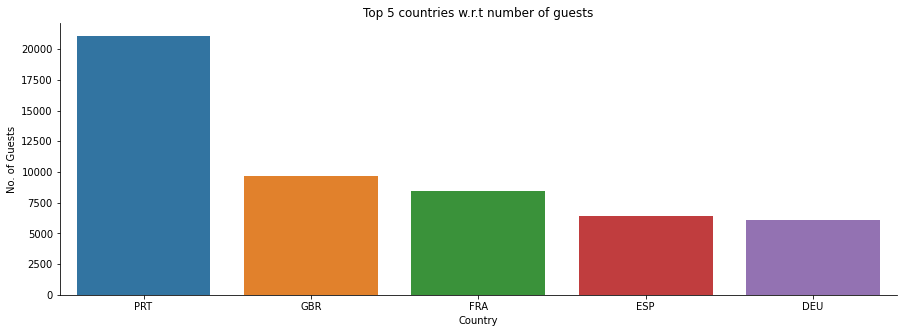

In [9]:
df_country = df[df['is_canceled']==0]
df_country = df_country[['country','adults']]
df_country = df_country['country'].value_counts()
df_country = df_country[:5]
df_country= pd.DataFrame({'Guests':df_country})

plt.figure(figsize=(15,5))
sns.barplot(x = df_country.index,y = df_country.Guests)
plt.ylabel("No. of Guests")
plt.xlabel('Country')
plt.title('Top 5 countries w.r.t number of guests')
sns.despine()

**Most of the guests are from Portugal and other countries in Europs**

# How much do guests pay for a room per night

**Both hotels have different room types and different meal arrangements.Seasonal factors are also important, So the prices varies a lot.**

In [10]:
#Price of rooms per night in city hotel

df_city = df[df['hotel'] == 'City Hotel']
df_city = df_city[df_city['is_canceled'] == 0]
df_city.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-03
40066,City Hotel,0,3,2015,July,27,2,0,3,1,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05
40070,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
40071,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient-Party,43.00,0,0,Check-Out,2015-07-05
40072,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05


**City Hotel**

<AxesSubplot:xlabel='reserved_room_type', ylabel='adr'>

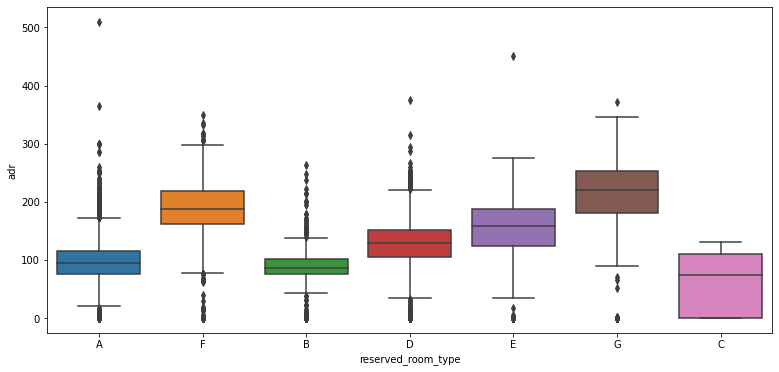

In [11]:
plt.figure(figsize = (13, 6))
sns.boxplot(x = 'reserved_room_type', y = 'adr', data = df_city)

In [12]:
#Price of rooms per night in resort hotel

df_resort = df[df['hotel'] == 'Resort Hotel']
df_resort = df_resort[df_resort['is_canceled'] == 0]
df_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Resort Hotel**

<AxesSubplot:xlabel='reserved_room_type', ylabel='adr'>

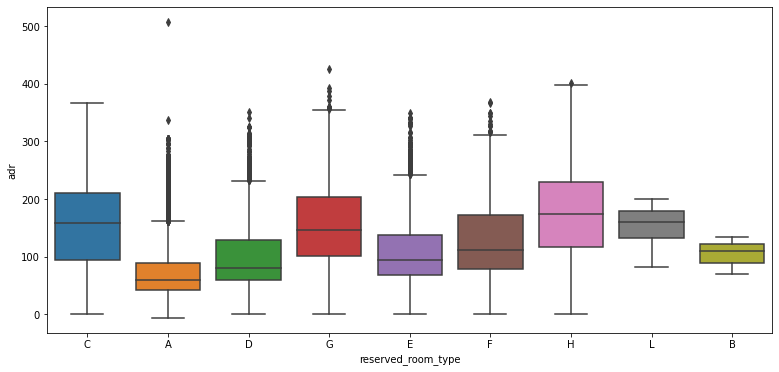

In [13]:
plt.figure(figsize = (13, 6))
sns.boxplot(x = 'reserved_room_type', y = 'adr', data = df_resort)

**The figure shows that the average price per room depends on its type and the standard deviation.**

# How do prices vary over the year

In [14]:
#averages prices over the year

df_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
df_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [15]:
df_resort = df_resort.groupby('arrival_date_month')['adr'].mean().reset_index()
df_resort

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [16]:
df_city = df_city.groupby('arrival_date_month')['adr'].mean().reset_index()
df_city

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [17]:
df_month = df_resort.merge(df_city, on = 'arrival_date_month')
df_month.columns = ['month', 'resort price', 'city price']
df_month

,month,resort price,city price
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


**month column is not in order, and if we visualize we will get improper conclusions.**

In [18]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

  Preparing metadata (setup.py) ... - done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3441 sha256=6722e5f681b920e2ae49be3e7f81da3f925c9349c31b79fb7e6f11c5fe74ecaf
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
  Preparing metadata (setup.py) ... - done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=525ae52c30f5d8fa227bbfc39e5b5a4efb9e7b62baccce2eb3fa7e56dc9471b9
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [19]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [20]:
df_month = sort_month(df_month, 'month')
df_month

,month,resort price,city price
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,150.122528,115.563810
7,August,181.205892,118.412083
8,September,96.416860,112.598452
9,October,61.727505,101.745956


In [21]:
data = []

cnt = 0
for a in df_month['city price']:
    data.append([df_month['month'][cnt], a, 'city price'])
    cnt += 1

cnt = 0
for a in df_month['resort price']:
    data.append([df_month['month'][cnt], a, 'resort price'])
    cnt += 1

df_month2 = pd.DataFrame(data, columns = ['month', 'price', 'label'])
df_month2

,month,price,label
0,January,82.160634,city price
1,February,86.183025,city price
2,March,90.170722,city price
3,April,111.856824,city price
4,May,120.445842,city price
5,June,117.702075,city price
6,July,115.563810,city price
7,August,118.412083,city price
8,September,112.598452,city price
9,October,101.745956,city price


<AxesSubplot:xlabel='month', ylabel='price'>

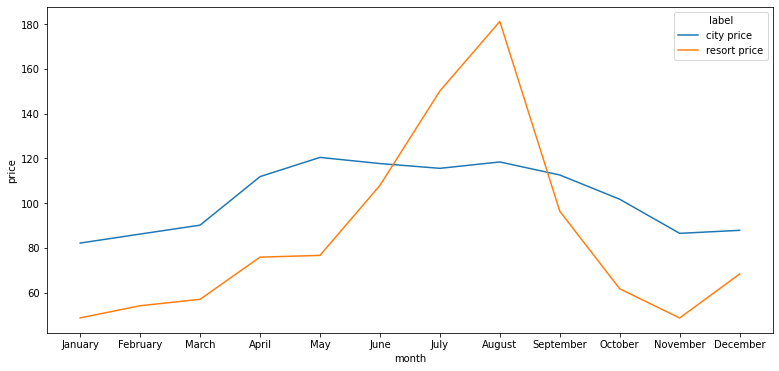

In [22]:
plt.figure(figsize = (13, 6))
sns.lineplot(x = 'month', y = 'price', hue = 'label', data = df_month2)


**This plot clearly shows that prices in the Resort Hotel are much higher during the summer and prices of city hotel varies less and is most expensive during Spring and Autumn .**

# Which are the most busy months?

In [23]:
#most busy months
df_city = df[df['hotel'] == 'City Hotel']
df_city = df_city[df_city['is_canceled'] == 0]
df_resort = df[df['hotel'] == 'Resort Hotel']
df_resort = df_resort[df_resort['is_canceled'] == 0]

In [24]:
resort_guests = df_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns = ['month', 'no. of guests']
resort_guests

,month,no. of guests
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [25]:
city_guests = df_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns = ['month', 'no. of guests']
city_guests

,month,no. of guests
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [26]:
final_guests = resort_guests.merge(city_guests, on = 'month')
final_guests.columns = ['month', 'resort guests', 'city guests']
final_guests = sort_month(final_guests, 'month')
final_guests

,month,resort guests,city guests
0,January,1868,2254
1,February,2308,3064
2,March,2573,4072
3,April,2550,4015
4,May,2535,4579
5,June,2038,4366
6,July,3137,4782
7,August,3257,5381
8,September,2102,4290
9,October,2577,4337


In [27]:
data = []

cnt = 0
for a in final_guests['resort guests']:
    data.append([df_month['month'][cnt], a, 'resort guests'])
    cnt += 1

cnt = 0
for a in final_guests['city guests']:
    data.append([df_month['month'][cnt], a, 'city guests'])
    cnt += 1

final_guests2 = pd.DataFrame(data, columns = ['month', 'no. of guests', 'label'])
final_guests2

,month,no. of guests,label
0,January,1868,resort guests
1,February,2308,resort guests
2,March,2573,resort guests
3,April,2550,resort guests
4,May,2535,resort guests
5,June,2038,resort guests
6,July,3137,resort guests
7,August,3257,resort guests
8,September,2102,resort guests
9,October,2577,resort guests


<AxesSubplot:xlabel='month', ylabel='no. of guests'>

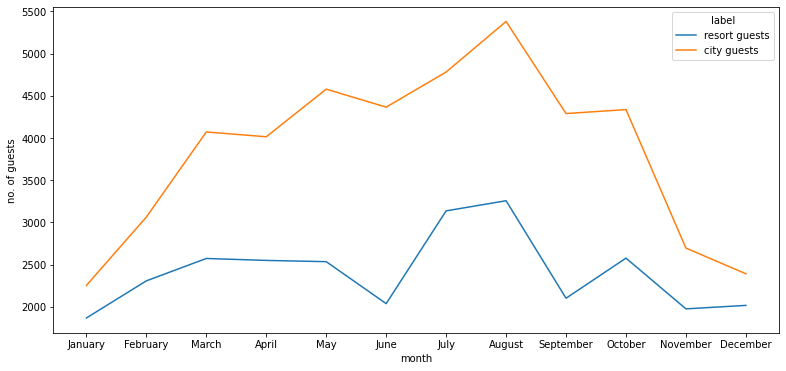

In [28]:
plt.figure(figsize = (13, 6))
sns.lineplot(x = 'month', y = 'no. of guests', hue = 'label', data = final_guests2)

#we can see the city hotel brings in more guests

**same peaks and dips as prices**

# How long do people stay at the Hotel

In [29]:
#Length of stay in Hotel

filter = df['is_canceled'] == 0
data = df[filter]
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [30]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,308
1,0,Resort Hotel,372
2,1,City Hotel,9169
3,1,Resort Hotel,6580
4,2,City Hotel,10992
...,...,...,...
63,49,City Hotel,1
64,56,Resort Hotel,1
65,57,City Hotel,1
66,60,Resort Hotel,1


<AxesSubplot:xlabel='total_nights', ylabel='Number of stays'>

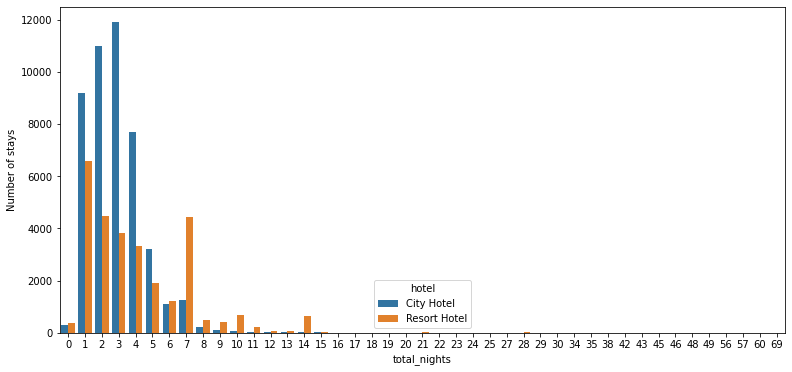

In [31]:
plt.figure(figsize = (13, 6))
sns.barplot(x = 'total_nights', y = 'Number of stays', hue = 'hotel', data = stay)